### Assignment 1 (4 scores):

In [81]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.backends.backend_pdf import PdfPages
import random
np.random.seed(18)

In [82]:
means = [[2,2],[8,3],[3,6]]
cov = [[1,0],[0,1]]

N = 500 
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0,X1,X2), axis=0)
K=3

original_labels = np.array([0]*N+[1]*N+[2]*N).T

In [83]:
def kmeans_display(X, label):
    X0 = X[label==0, :]
    X1 = X[label==1, :]
    X2 = X[label==2, :]

    kwargs = {"markersize": 5, "alpha": 0.8, "markeredgecolor": "k"}
    plt.plot(X0[:, 0], X0[:, 1], "b^", **kwargs)
    plt.plot(X1[:, 0], X1[:, 1], "go", **kwargs)
    plt.plot(X2[:, 0], X2[:, 1], "rs", **kwargs)

    plt.axis([-3,14,-2,10])
    plt.axis('scaled')
    plt.plot()
    plt.show()

In [84]:
def kmeans_init_centroids(X, k):
    return X[np.random.choice(X.shape[0], k)]

def kmeans_assign_labels(X, centroids):
    D = cdist(X, centroids)
    return np.argmin(D, axis = 1)

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
# collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
# take average
        centroids [k,:] = np.mean(Xk, axis = 0)
    return centroids

def has_converged(centroids, new_centroids):
# return True if two sets of centroids as the same
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

In [85]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]) )
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)

Centers found by k-means:
 [[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]


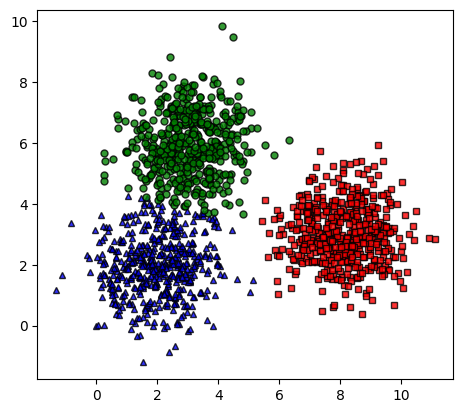

In [86]:
(centroids, labels, it) = kmeans(X, K)
print("Centers found by k-means:\n",centroids[-1])
kmeans_display(X, labels[-1])

### Assignment 2 (4 scores):

In [87]:
from sklearn.metrics import adjusted_rand_score

scores = []
for seed in range(10):
    np.random.seed(seed)
    (centroids, labels, iterations) = kmeans(X, K)  # đúng
    score = adjusted_rand_score(original_labels, labels[-1])
    scores.append(score)

print("ARI scores for different initializations:", np.round(scores, 3))
print("Mean ARI:", np.round(np.mean(scores), 3))


ARI scores for different initializations: [0.441 0.945 0.945 0.945 0.945 0.945 0.945 0.945 0.945 0.945]
Mean ARI: 0.895


Comment: Centroids khi được khởi tạo ngẫu nhiên sẽ khiến cho centroids có khả năng tìm thấy những điểm hội tụ cục bộ, khiến cho mô hình bị giảm hiệu suất so với những centroids tìm được điểm hội tụ toàn cục.

In [88]:
means = [[2,2],[8,3],[3,6]]
cov = [[1,0],[0,1]]

N0 = 50
N1 = 20
N2 = 1000

X0 = np.random.multivariate_normal(means[0], cov, N0)
X1 = np.random.multivariate_normal(means[1], cov, N1)
X2 = np.random.multivariate_normal(means[2], cov, N2)

X = np.concatenate((X0,X1,X2), axis=0)
K=3

original_labels = np.array([0]*N0+[1]*N1+[2]*N2).T

Centers found by k-means:
 [[2.19268605 6.10691135]
 [3.79662014 6.08101152]
 [3.61007591 3.07288665]]


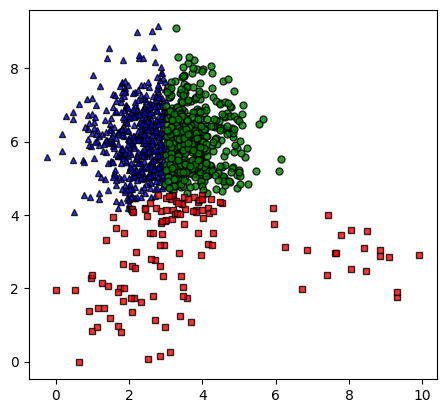

In [89]:
(centroids, labels, it) = kmeans(X, K)
print("Centers found by k-means:\n",centroids[-1])
kmeans_display(X, labels[-1])

In [90]:
from sklearn.metrics import adjusted_rand_score

scores = []
for seed in range(10):
    np.random.seed(seed)
    (centroids, labels, iterations) = kmeans(X, K)  # đúng
    score = adjusted_rand_score(original_labels, labels[-1])
    scores.append(score)

print("ARI scores for different initializations:", np.round(scores, 3))
print("Mean ARI:", np.round(np.mean(scores), 3))


ARI scores for different initializations: [0.098 0.132 0.073 0.098 0.142 0.132 0.141 0.098 0.098 0.098]
Mean ARI: 0.111


### Assignment 3 (2 scores):

Comment:
Trong ví dụ này, cụm có 1000 điểm (cụm 3) chi phối hoàn toàn trung bình toàn cục, khiến thuật toán K-means có xu hướng chia các cụm nhỏ thành cùng cụm lớn. Thuật toán bị lệch về cụm lớn do K-means tối thiểu tổng bình phương khoảng cách, nên ưu tiên giảm lỗi của cụm lớn hơn. => Các cụm nhỏ hơn bị bỏ qua và giảm hiệu suất mô hình.

In [91]:
means = [[2,2],[8,3],[3,6]]
cov1 = [[1,0],[0,1]]
cov2 = [[10,0],[0,1]]

N0 = 200
N1 = 200
N2 = 200

X0 = np.random.multivariate_normal(means[0], cov1, N0)
X1 = np.random.multivariate_normal(means[1], cov1, N1)
X2 = np.random.multivariate_normal(means[2], cov2, N2)

X = np.concatenate((X0,X1,X2), axis=0)
K=3

original_labels = np.array([0]*N0+[1]*N1+[2]*N2).T

Centers found by k-means:
 [[1.43318871 6.0934155 ]
 [2.00694507 1.99774013]
 [7.74173319 3.48538703]]


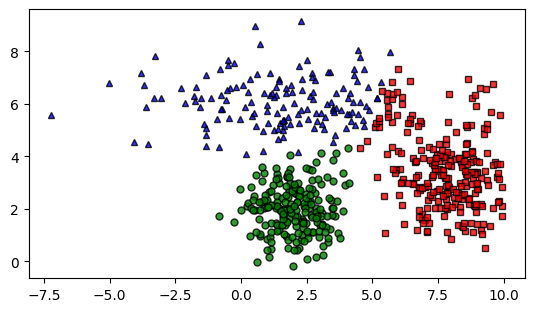

In [92]:
(centroids, labels, it) = kmeans(X, K)
print("Centers found by k-means:\n",centroids[-1])
kmeans_display(X, labels[-1])

In [93]:
from sklearn.metrics import adjusted_rand_score

scores = []
for seed in range(10):
    np.random.seed(seed)
    (centroids, labels, iterations) = kmeans(X, K)  # đúng
    score = adjusted_rand_score(original_labels, labels[-1])
    scores.append(score)

print("ARI scores for different initializations:", np.round(scores, 3))
print("Mean ARI:", np.round(np.mean(scores), 3))


ARI scores for different initializations: [0.719 0.736 0.719 0.736 0.719 0.736 0.736 0.719 0.736 0.729]
Mean ARI: 0.728


Cụm thứ ba bị kéo dài theo trục x, trong khi 2 cụm còn lại có dạng gần tròn.K-means sẽ khó phân biệt các điểm ở vùng giao thoa giữa cụm dãn dài và các cụm khác, dễ gây lỗi phân cụm khi centroids sẽ ưu tiên ở 2 cụm tròn.

